In [228]:
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
csv_filepath = '../data/goes_timeseries_dec2023.csv'
df_GOES = pd.read_csv(csv_filepath)

In [230]:
# points = [
#         {"i": int(lon_idx)+istep, "j": int(lat_idx)+istep, "name": 'NE'},
#         {"i": int(lon_idx)+istep, "j": int(lat_idx), "name": 'East'},
#         {"i": int(lon_idx)+istep, "j": int(lat_idx)-istep, "name": 'SE'},
#         {"i": int(lon_idx), "j": int(lat_idx)+istep, "name": 'N'},
#         {"i": int(lon_idx), "j": int(lat_idx)-istep, "name": 'S'},
#         {"i": int(lon_idx)-istep, "j": int(lat_idx)+istep, "name": 'NW'},
#         {"i": int(lon_idx)-istep, "j": int(lat_idx), "name": 'W'},
#         {"i": int(lon_idx)-istep, "j": int(lat_idx)-istep, "name": 'SW'},
#     ]

df_GOES.tail(
)

,time,step,points_index,t,y,x,y_image,x_image,CMI_C10
43619,286,18,3,2024-09-07 18:37:35.841213952,0.074452,-0.014364,0.08624,-0.03136,257.51990
43620,286,18,4,2024-09-07 18:37:35.841213952,0.076580,-0.014364,0.08624,-0.03136,257.07090
43621,286,18,5,2024-09-07 18:37:35.841213952,0.074452,-0.015428,0.08624,-0.03136,257.91900
43622,286,18,6,2024-09-07 18:37:35.841213952,0.075516,-0.015428,0.08624,-0.03136,257.61970
43623,286,18,7,2024-09-07 18:37:35.841213952,0.076580,-0.015428,0.08624,-0.03136,258.06866


In [231]:
#remapping to clockwise
# Define the mapping of old values to new values
value_mapping = {
    3: 0,
    0: 1,
    1: 2,
    2: 3,
    4: 4,
    7: 5,
    6: 6,
    5: 7
}

# Replace values in the specified column
df_GOES['points_index'] = df_GOES['points_index'].replace(value_mapping)

In [232]:
df_GOES.head(16)

,time,step,points_index,t,y,x,y_image,x_image,CMI_C10
0,0,0,1,2024-09-06 18:47:35.819172992,0.075460,-0.014308,0.08624,-0.03136,256.62190
1,0,0,2,2024-09-06 18:47:35.819172992,0.075516,-0.014308,0.08624,-0.03136,256.52210
2,0,0,3,2024-09-06 18:47:35.819172992,0.075572,-0.014308,0.08624,-0.03136,256.47223
3,0,0,0,2024-09-06 18:47:35.819172992,0.075460,-0.014364,0.08624,-0.03136,256.57202
4,0,0,4,2024-09-06 18:47:35.819172992,0.075572,-0.014364,0.08624,-0.03136,256.37244
5,0,0,7,2024-09-06 18:47:35.819172992,0.075460,-0.014420,0.08624,-0.03136,256.52210
6,0,0,6,2024-09-06 18:47:35.819172992,0.075516,-0.014420,0.08624,-0.03136,256.47223
7,0,0,5,2024-09-06 18:47:35.819172992,0.075572,-0.014420,0.08624,-0.03136,256.47223
8,0,1,1,2024-09-06 18:47:35.819172992,0.075404,-0.014252,0.08624,-0.03136,256.77155
9,0,1,2,2024-09-06 18:47:35.819172992,0.075516,-0.014252,0.08624,-0.03136,256.57202


In [233]:
# Convert the 't' column to datetime format with error handling
df_GOES_sorted['t'] = pd.to_datetime(df_GOES_sorted['t'], errors='coerce')

# Check for any NaT values (indicates a failed conversion)
invalid_dates = df_GOES_sorted[df_GOES_sorted['t'].isna()]

# Display rows with invalid dates if any
if not invalid_dates.empty:
    print("Rows with invalid dates that could not be converted:")
    print(invalid_dates)

# Verify the data types again
print("Data types after conversion:")
print(df_GOES_sorted.dtypes)

if not invalid_dates.empty:
    print("Rows with invalid dates that could not be converted:")
    print(invalid_dates)
else:
    print("All dates converted successfully.")

Data types after conversion:
time                     int64
step                     int64
points_index             int64
t               datetime64[ns]
y                      float64
x                      float64
y_image                float64
x_image                float64
CMI_C10                float64
dtype: object
All dates converted successfully.


In [234]:
df_GOES_sorted = df_GOES.sort_values(by=['t', 'step', 'points_index'], ascending=[True, True, True])
df_GOES_sorted = df_GOES_sorted.reset_index(drop=True)
df_GOES_sorted['t'] = pd.to_datetime(df_GOES_sorted['t'], errors='coerce')
print(df_GOES_sorted.dtypes)

time                     int64
step                     int64
points_index             int64
t               datetime64[ns]
y                      float64
x                      float64
y_image                float64
x_image                float64
CMI_C10                float64
dtype: object


In [235]:
df_GOES_sorted.head(153)

,time,step,points_index,t,y,x,y_image,x_image,CMI_C10
0,0,0,0,2024-09-06 18:47:35.819172992,0.075460,-0.014364,0.08624,-0.03136,256.57202
1,0,0,1,2024-09-06 18:47:35.819172992,0.075460,-0.014308,0.08624,-0.03136,256.62190
2,0,0,2,2024-09-06 18:47:35.819172992,0.075516,-0.014308,0.08624,-0.03136,256.52210
3,0,0,3,2024-09-06 18:47:35.819172992,0.075572,-0.014308,0.08624,-0.03136,256.47223
4,0,0,4,2024-09-06 18:47:35.819172992,0.075572,-0.014364,0.08624,-0.03136,256.37244
...,...,...,...,...,...,...,...,...,...
148,0,18,4,2024-09-06 18:47:35.819172992,0.076580,-0.014364,0.08624,-0.03136,255.87355
149,0,18,5,2024-09-06 18:47:35.819172992,0.076580,-0.015428,0.08624,-0.03136,254.22720
150,0,18,6,2024-09-06 18:47:35.819172992,0.075516,-0.015428,0.08624,-0.03136,256.12300
151,0,18,7,2024-09-06 18:47:35.819172992,0.074452,-0.015428,0.08624,-0.03136,257.12080


In [236]:
print(df_GOES_sorted.dtypes)

time                     int64
step                     int64
points_index             int64
t               datetime64[ns]
y                      float64
x                      float64
y_image                float64
x_image                float64
CMI_C10                float64
dtype: object


In [237]:
# Calculate the difference between consecutive dates
date_diff = df_GOES_sorted['t'].diff()

# Find gaps where the difference is greater than expected (e.g., 1 minute, 1 second, etc.)
# Adjust the 'expected_freq' as per your dataset's frequency
expected_freq = '5m'  # For example, 1 second interval
gaps = date_diff[date_diff > pd.to_timedelta(expected_freq)]

# Display the gaps
print("Gaps in the datetime column 't':")
print(gaps)

Gaps in the datetime column 't':
152     0 days 00:05:00.310145024
456     0 days 00:05:00.007031040
608     0 days 00:05:00.019596928
912        0 days 00:05:00.590784
1368    0 days 00:05:00.386342912
                   ...           
41952   0 days 00:05:00.297923968
42104   0 days 00:05:00.332805888
42408   0 days 00:05:00.598911104
42864   0 days 00:05:00.001417984
43016   0 days 00:05:00.592701056
Name: t, Length: 141, dtype: timedelta64[ns]


In [238]:
for step in range(0, 19):
    # Filter the DataFrame to only include rows where 'step' equals the current step
    df_filtered = df_GOES_sorted[df_GOES_sorted['step'] == step]

    # Create a new figure for each step
    plt.figure(figsize=(16, 4))

    # Loop through each unique value in 'points_index'
    for index in df_filtered['points_index'].unique():
        # Filter data for each 'points_index' and plot
        subset = df_filtered[df_filtered['points_index'] == index]
        plt.plot(subset['t'], subset['CMI_C10'], label=f'points_index {index}')

    # Labeling the axes
    plt.xlabel('Time (t)')
    plt.ylabel('CMI_C10 Value')
    plt.title(f'CMI_C10 Values for Each points_index Where Step = {step}')

    # Display legend
    plt.legend()

    # Save the plot to a file
    plt.savefig(f'../img/CMI_C10_step_{step}.png')

    # Close the plot to avoid memory issues
    plt.close()

In [239]:
step = 18
df_filtered = df_GOES_sorted[df_GOES_sorted['step'] == step]

In [240]:
drop_cols = ['x', 'y', 'x_image', 'y_image', 'time', 'step']
df_filtered = df_filtered.drop(drop_cols, axis=1)  #df = df.drop('column_name', axis=1)

In [241]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.head(10)

,points_index,t,CMI_C10
0,0,2024-09-06 18:47:35.819172992,256.67178
1,1,2024-09-06 18:47:35.819172992,252.08197
2,2,2024-09-06 18:47:35.819172992,255.67400
3,3,2024-09-06 18:47:35.819172992,254.87576
4,4,2024-09-06 18:47:35.819172992,255.87355
5,5,2024-09-06 18:47:35.819172992,254.22720
6,6,2024-09-06 18:47:35.819172992,256.12300
7,7,2024-09-06 18:47:35.819172992,257.12080
8,0,2024-09-06 18:52:36.129318016,256.62190
9,1,2024-09-06 18:52:36.129318016,254.77600


In [242]:
# Use the pivot method to reshape the DataFrame
df_pivot = df_filtered.pivot(index='t', columns='points_index', values='CMI_C10')

# Reset the column names for clarity
df_pivot.columns = [f'points_index_{col}' for col in df_pivot.columns]

# Reset index if you want 't' as a column
df_pivot = df_pivot.reset_index()


In [243]:
# Rename columns to the desired names
df_pivot.columns = ['time','ch0_North', 'ch1_NorthEast', 'ch2_East', 'ch3_SouthEast', 'ch4_South', 'ch5_SouthWest', 'ch6_West', 'ch7_NorthWest']
df_pivot.head()

,time,ch0_North,ch1_NorthEast,ch2_East,ch3_SouthEast,ch4_South,ch5_SouthWest,ch6_West,ch7_NorthWest
0,2024-09-06 18:47:35.819172992,256.67178,252.08197,255.67400,254.87576,255.87355,254.22720,256.12300,257.12080
1,2024-09-06 18:52:36.129318016,256.62190,254.77600,255.72389,255.07533,255.52434,252.28152,256.27267,257.17065
2,2024-09-06 18:57:36.099942016,256.62190,254.52655,255.72389,255.37466,255.72389,253.37909,256.37244,257.02100
3,2024-09-06 19:02:36.106973056,256.52210,256.07312,255.77377,255.37466,255.52434,253.87799,256.22278,257.27045
4,2024-09-06 19:07:36.126569984,256.52210,256.17290,255.82367,255.42455,255.42455,252.53098,256.22278,257.02100


In [244]:
df_pivot.shape

(287, 9)

In [245]:
df_pivot.tail()

,time,ch0_North,ch1_NorthEast,ch2_East,ch3_SouthEast,ch4_South,ch5_SouthWest,ch6_West,ch7_NorthWest
282,2024-09-07 18:17:35.843673984,257.71945,257.27045,256.67178,256.77155,257.1208,257.86914,257.37024,257.8192
283,2024-09-07 18:22:36.436375040,257.61970,257.12080,256.77155,256.82147,257.0709,257.71945,257.42010,257.9190
284,2024-09-07 18:27:36.422831104,257.66956,257.27045,256.52210,256.82147,257.0709,257.96890,257.51990,257.9190
285,2024-09-07 18:32:35.841867008,257.42010,257.27045,256.67178,256.82147,257.0709,257.86914,257.61970,257.9190
286,2024-09-07 18:37:35.841213952,257.51990,257.22058,256.57202,256.82147,257.0709,258.06866,257.61970,257.9190


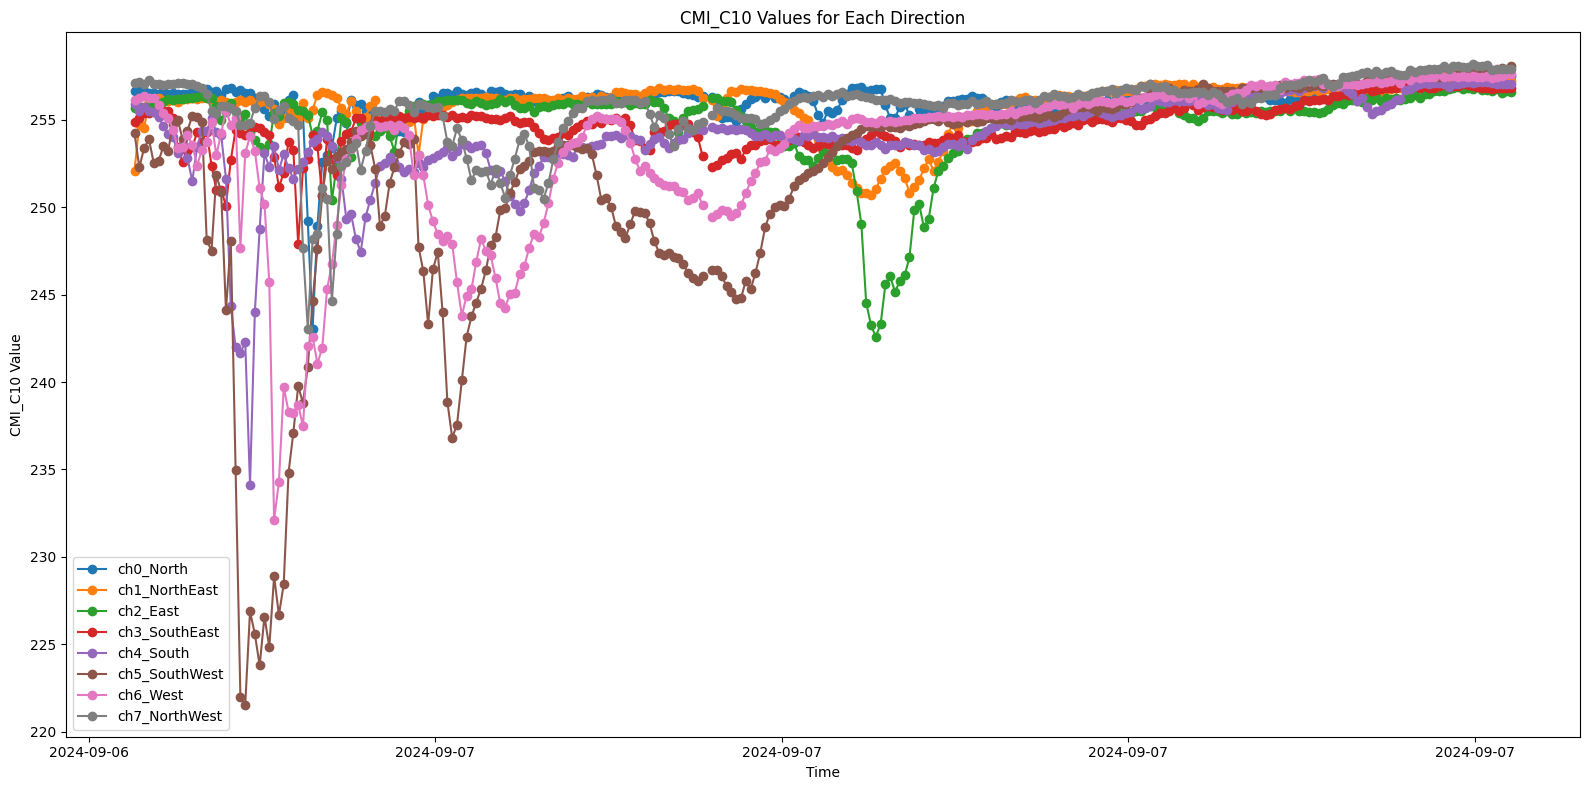

In [246]:
plt.figure(figsize=(16, 8))
for column in df_pivot.columns[1:]:
    plt.plot(df_pivot['time'], df_pivot[column], marker='o', label=column)

# Set x-axis labels
plt.xlabel('Time')
plt.ylabel('CMI_C10 Value')
plt.title('CMI_C10 Values for Each Direction')

# Reduce the number of x-axis time markers
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("../img/clouds.png")
plt.show()

In [247]:
df_pivot = df_pivot.drop(columns=['time'])

points_between = (7200 - len(df_pivot)) // (len(df_pivot) - 1)

# Create a new index with more points between each existing index
new_index = []
for i in range(len(df_pivot) - 1):
    # Create points between each pair of consecutive data points
    new_index.extend(np.linspace(i, i+1, points_between + 2)[:-1])
new_index.append(len(df_pivot) - 1)  # Include the last point

# Reindex the DataFrame to the new index
df_interpolated = df_pivot.reindex(new_index)

# Interpolate the numeric columns linearly
df_interpolated = df_interpolated.interpolate(method='linear')

# Reset the index if needed
df_interpolated = df_interpolated.reset_index(drop=True)

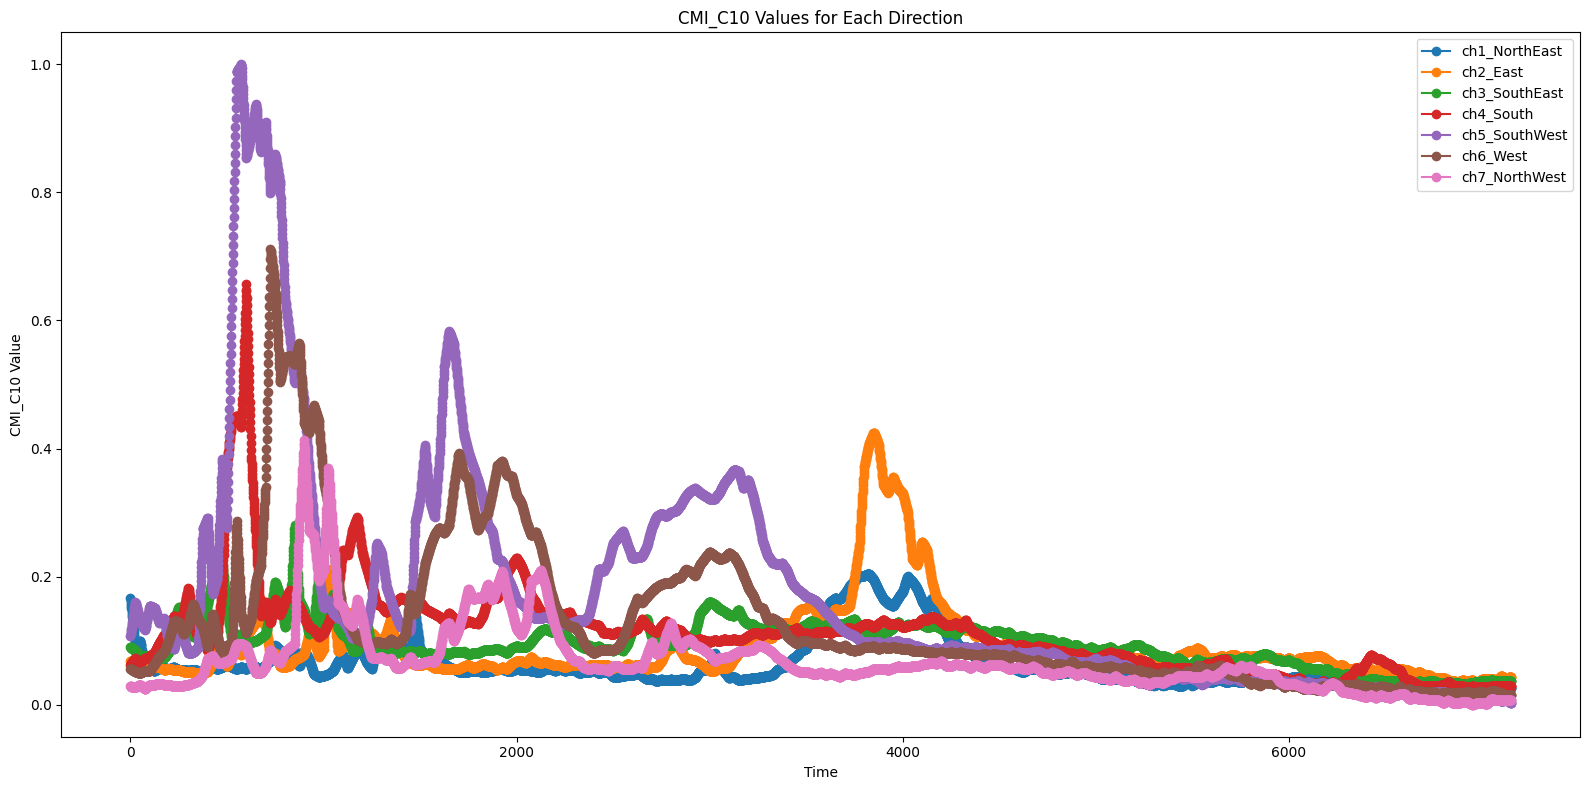

In [254]:
# Calculate the global minimum and maximum values across all columns
global_min = df_interpolated.min().min()
global_max = df_interpolated.max().max()

# Normalize each column using the global min and max
df_normalized = (df_interpolated - global_min) / (global_max - global_min)
df_normalized = 1.0- df_normalized

plt.figure(figsize=(16, 8))
for column in df_pivot.columns[1:]:
    plt.plot(df_normalized.index, df_normalized[column], marker='o', label=column)

# Set x-axis labels
plt.xlabel('Time')
plt.ylabel('CMI_C10 Value')
plt.title('CMI_C10 Values for Each Direction')

# Reduce the number of x-axis time markers
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("../img/clouds_interpolated.png")
plt.show()

In [255]:
df_normalized.to_csv('../data/clouds.csv', index = True)